In [14]:
import pandas as pd
import numpy as np
import seaborn as sns  
import matplotlib.pyplot as plt
import regex
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [15]:
%matplotlib inline

In [16]:
# uploading the cleaned dataset
df = pd.read_csv('../Data/df_cleaned')
df.head(5)

,airline_sentiment,airline_sentiment_confidence,airline,retweet_count,text
0,positive,0.3486,Virgin America,0,@VirginAmerica plus you've added commercials t...
1,negative,1.0000,Virgin America,0,@VirginAmerica it's really aggressive to blast...
2,negative,1.0000,Virgin America,0,@VirginAmerica and it's a really big bad thing...
3,negative,1.0000,Virgin America,0,@VirginAmerica seriously would pay $30 a fligh...
4,positive,0.6745,Virgin America,0,"@VirginAmerica yes, nearly every time I fly VX..."


In [17]:
# convert the lables type from object to the class type
def con_label(item):
    if item == 'positive':
        return 1
    else:
        return 0

In [18]:
# Apply the function on the df labels
df['air_target'] = np.vectorize(con_label)(df['airline_sentiment'])

In [19]:
df['air_target'].unique()

array([1, 0])

In [20]:
# Drop the old lables
df = df.drop('airline_sentiment',axis=1)

In [21]:
air_count = df['airline'].value_counts()

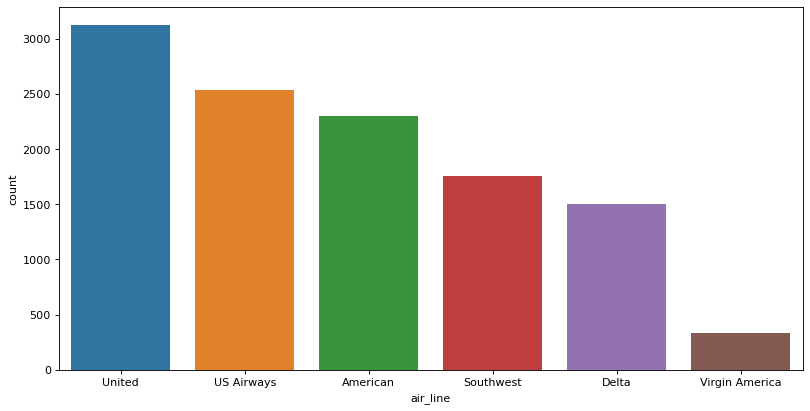

In [22]:
plt.figure(figsize=(12,6),dpi=80)
sns.barplot(x = air_count.index,y=air_count)
plt.xlabel('air_line')
plt.ylabel('count');
plt.savefig('../Figure/air_vs_count.png')

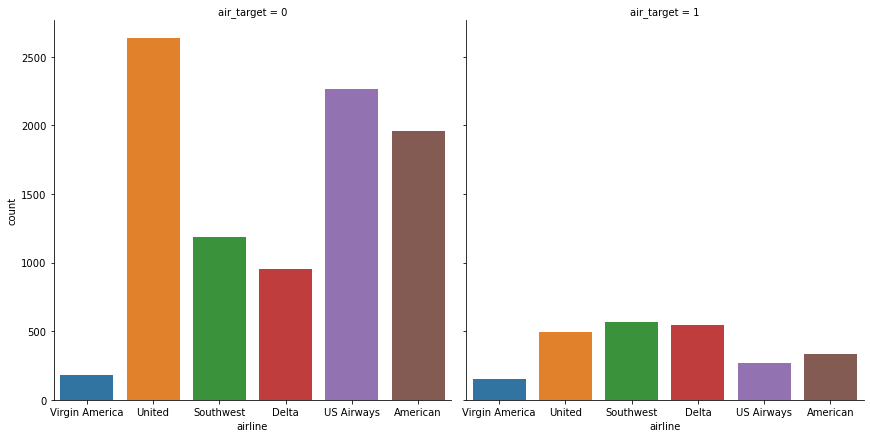

In [23]:
sns.catplot(x='airline',data=df,col='air_target',kind="count",height=6)
plt.savefig('../Figure/air_vs_target.png')

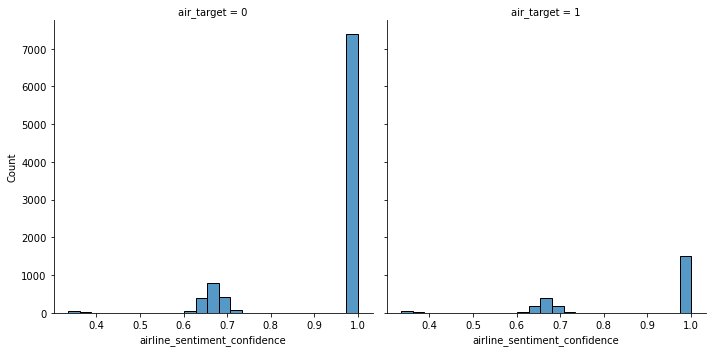

In [24]:
sns.displot(x='airline_sentiment_confidence',data=df,bins=25,col='air_target',height=5)
plt.savefig('../Figure/air_sentiment_confidence_vs_target.png')

# Text cleaning

In [25]:
def text_clean(text):
    # Romiving punctioation
    rem_punc = re.sub("[^-9A-za-z ]"," ",text)
    # Removing white spaces
    rem_space = re.sub(' +',' ',rem_punc)
    rem_space = ''.join(rem_space)
    # Removing stop words
    rem_stppword = [word for word in rem_space.lower().split() if word not in stopwords.words('english')]
    rem_stppword = " ".join(rem_stppword)
    return rem_stppword

In [26]:
# Applying the clean_text function on "text" coulmn
df['text'] = np.vectorize(text_clean)(df['text'])

In [27]:
df.head(5)

,airline_sentiment_confidence,airline,retweet_count,text,air_target
0,0.3486,Virgin America,0,virginamerica plus added commercials experienc...,1
1,1.0000,Virgin America,0,virginamerica really aggressive blast obnoxiou...,0
2,1.0000,Virgin America,0,virginamerica really big bad thing,0
3,1.0000,Virgin America,0,virginamerica seriously would pay flight seats...,0
4,0.6745,Virgin America,0,virginamerica yes nearly every time fly vx ear...,1


In [28]:
# Counting the numbers of the words in the "text" column
df['word_count'] = df['text'].apply(lambda x:len(x.split()))
df.head(2)

,airline_sentiment_confidence,airline,retweet_count,text,air_target,word_count
0,0.3486,Virgin America,0,virginamerica plus added commercials experienc...,1,6
1,1.0000,Virgin America,0,virginamerica really aggressive blast obnoxiou...,0,11


In [31]:
# Counting the 'text' length
df['text_length'] = df['text'].apply(lambda i:len(i))
df['text_length']

0         53
1         94
2         34
3         81
4         59
        ... 
11536    117
11537     28
11538     46
11539    109
11540     73
Name: text_length, Length: 11541, dtype: int64

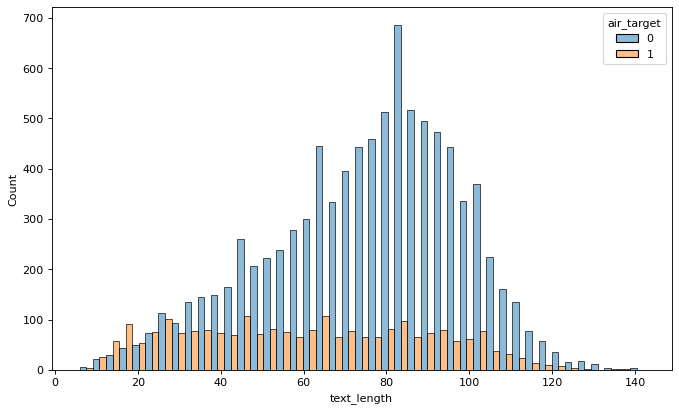

In [54]:
# Text length distribution based on the label
plt.figure(figsize=(10,6),dpi=80)
sns.histplot(x='text_length',data=df,hue='air_target',multiple="dodge",alpha=0.5,)
plt.savefig('../Figure/text_length_vs_target.png')

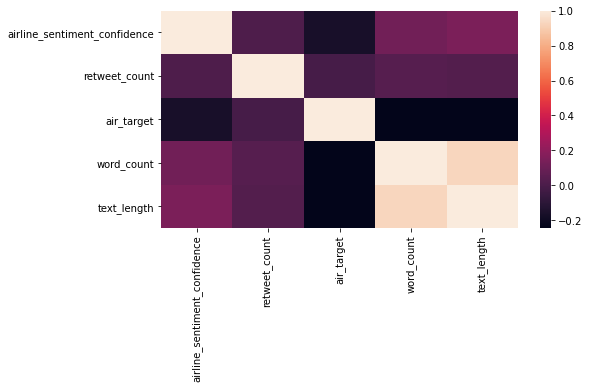

In [57]:
#Check the correlation between the features and taregt
plt.figure(figsize=(8,4))
sns.heatmap(df.corr())
plt.savefig('../Figure/heatmap.png')

In [58]:
# Check out the correlation between features vs label
df_corr = df.corr()['air_target'].sort_values(ascending=False)[1:]
df_corr

retweet_count                  -0.012603
airline_sentiment_confidence   -0.165447
text_length                    -0.243933
word_count                     -0.244414
Name: air_target, dtype: float64

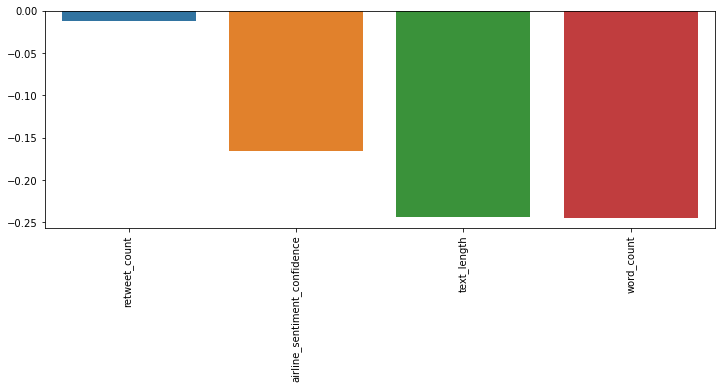

In [59]:
plt.figure(figsize=(12,4))
sns.barplot(x=df_corr.index,y=df_corr.values)
plt.xticks(rotation=90);
plt.savefig('../Figure/correlation.png')

# Count vectorizer

Check the most frequent words base on the labels using Count_vecrotizer

In [124]:
# create count_vectorizer
cv = CountVectorizer()

In [126]:
# Select the text rows with only air_target ==1
matrix = cv.fit_transform(df[df['air_target']==1]['text'])
# get the features name and count them and create the tuple using the Zip function
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest 20 yop words
print("Top 20 words used for Positive reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Positive reviews.
[('thanks', 611), ('jetblue', 595), ('southwestair', 576), ('united', 528), ('thank', 455), ('flight', 381), ('americanair', 355), ('usairways', 276), ('great', 236), ('co', 233), ('http', 217), ('service', 162), ('virginamerica', 156), ('love', 136), ('customer', 114), ('get', 114), ('guys', 110), ('good', 109), ('much', 109), ('best', 105)]


Plot top_20_words in label 1

In [128]:
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
target_1_top20 = sorted(freqs, key=lambda x: -x[1])[:20]
target_1_top20

[('thanks', 611),
 ('jetblue', 595),
 ('southwestair', 576),
 ('united', 528),
 ('thank', 455),
 ('flight', 381),
 ('americanair', 355),
 ('usairways', 276),
 ('great', 236),
 ('co', 233),
 ('http', 217),
 ('service', 162),
 ('virginamerica', 156),
 ('love', 136),
 ('customer', 114),
 ('get', 114),
 ('guys', 110),
 ('good', 109),
 ('much', 109),
 ('best', 105)]

In [132]:
# get first and second element from tuple
first_tuple_elements = [a_tuple[0] for a_tuple in target_1_top20]
second_tuple_elements = [a_tuple[1] for a_tuple in target_1_top20]

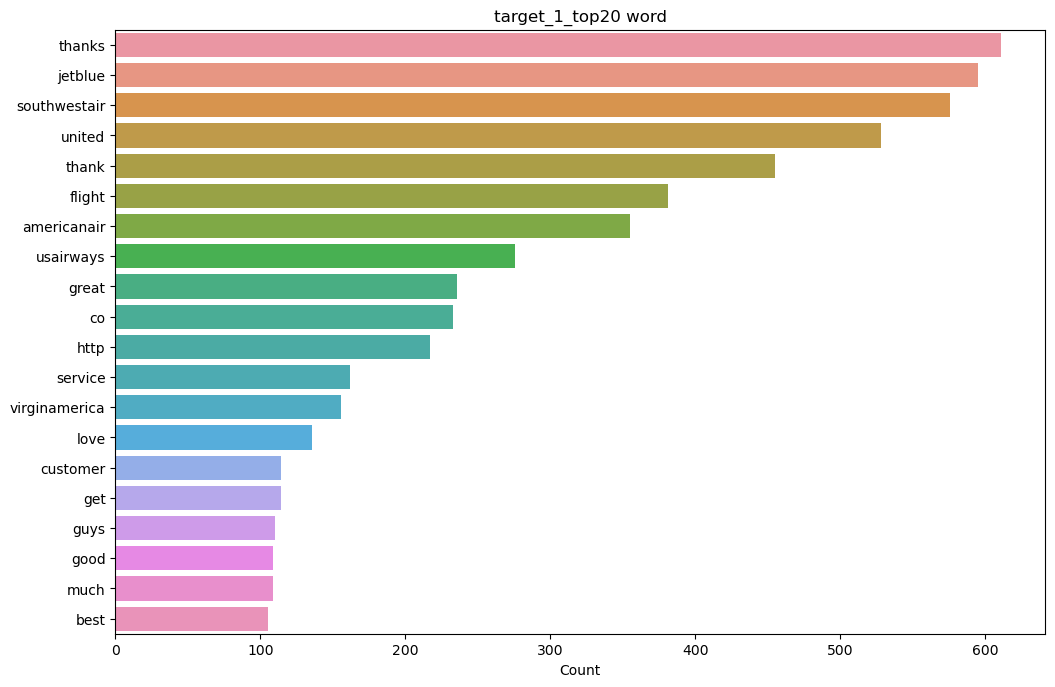

In [138]:
# plot the top 20 word in the label 1
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(x=second_tuple_elements,y=first_tuple_elements)
plt.xlabel('Count')
plt.title('target_1_top20 word')
plt.savefig('../Figure/target_1_top20 words.png')

In [139]:
# top 20 words in the lable 0
matrix = cv.fit_transform(df[df['air_target']== 0]['text'])
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])    
# sort from largest to smallest
print("Top 20 words used for Negative reviews.")
print(sorted(freqs, key=lambda x: -x[1])[:20])

Top 20 words used for Negative reviews.
[('flight', 2958), ('united', 2900), ('usairways', 2375), ('americanair', 2110), ('southwestair', 1214), ('jetblue', 1053), ('get', 990), ('cancelled', 926), ('service', 750), ('hours', 659), ('help', 619), ('customer', 614), ('hold', 614), ('time', 599), ('plane', 532), ('delayed', 508), ('amp', 503), ('us', 502), ('still', 492), ('call', 462)]


In [141]:
freqs = zip(cv.get_feature_names(), matrix.sum(axis=0).tolist()[0])
target_0_top20 = sorted(freqs, key=lambda x: -x[1])[:20]

In [142]:
# get first and second element from tuple
first_tuple_elements_0 = [a_tuple[0] for a_tuple in target_1_top20]
second_tuple_elements_0 = [a_tuple[1] for a_tuple in target_1_top20]

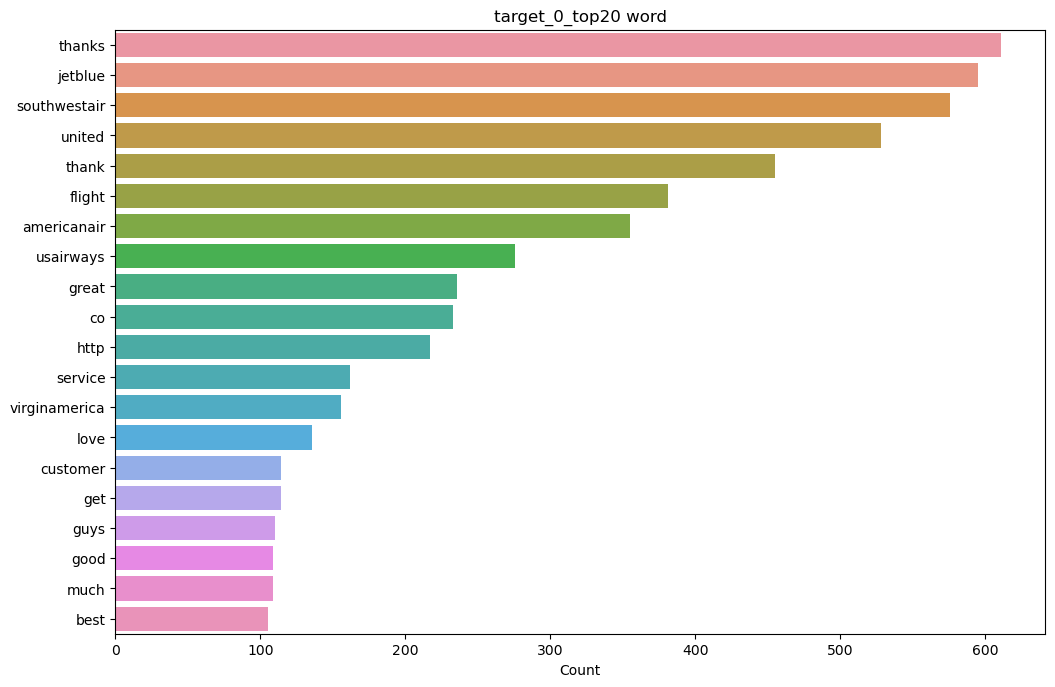

In [147]:
plt.figure(figsize=(12,8),dpi=100)
sns.barplot(x=second_tuple_elements,y=first_tuple_elements)
plt.xlabel('Count')
plt.title('target_0_top20 word')
plt.savefig('../Figure/target_0_top20 words.png')

In [148]:
# Save dateset
df.to_csv('../Data/df_final',index=False)